## 使用Keras 分類 Iris

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [0]:
#X_scaled

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential() 
# Dense: x * w + b 
model.add(tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4))
model.add(tf.keras.layers.Dense(units = 3))

In [0]:
model = tf.keras.models.Sequential( [
# Dense: x * w + b 
tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4),
tf.keras.layers.Dense(units = 3)
])

- 如果目標資料是 one-hot 編碼, 使用 categorical_crossentropy.

```
one-hot 編碼範例:
[1,0,0]
[0,1,0]
[0,0,1]
```

- 如果目標是整數 integers,使用sparse_categorical_crossentropy

```
整數範例
1
2
3
```

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
                  optimizer='sgd',
                  metrics=['accuracy'])

In [0]:
history = model.fit(X_scaled, y,
                    batch_size = 30,
                    epochs=1000,
                    verbose=0)

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

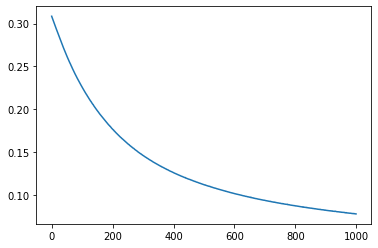

In [27]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

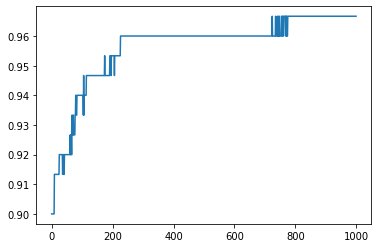

In [28]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [0]:
import numpy as np
y_pred = np.argmax(model(X_scaled).numpy(), axis = 1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9666666666666667

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

In [0]:
n_classes  = 3
y_onehot = tf.keras.utils.to_categorical(iris.target, n_classes)

In [0]:
model2 = tf.keras.models.Sequential( [
# Dense: x * w + b 
tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 4),
tf.keras.layers.Dense(units = 3, activation='softmax')
])

In [0]:
model2.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

In [43]:
history = model2.fit(X_scaled, y_onehot,
                    batch_size = 30,
                    epochs=10,
                    verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9733
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9733
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9733
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9733
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9733
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9733
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9733


## 客戶流失分析

### 資料讀取

In [44]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [46]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [0]:
# 根據位置篩選資料 .iloc[列,欄]
df = df.iloc[:,3:]

In [49]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
# 建立虛擬變量 (create dummy variable)
house = pandas.DataFrame([{'區域':'大安區'},
                      {'區域':'中山區'},
                      {'區域':'大同區'},
                      {'區域':'中山區'},
                      {'區域':'大安區'}])

In [58]:
area = pandas.get_dummies(house['區域'])
del area['中山區']
area
#house

,大同區,大安區
0,0,1
1,0,0
2,1,0
3,0,0
4,0,1


In [59]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].replace({'yes': 1, 'no': 0})
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
# 今天天氣真好
# 今天會下大雨

# 今天 天氣 真好 會 下大雨
#  1   1    1   0    0
#  1   0    0   1    1

In [0]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### 切訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.33, random_state = 123 )

In [63]:
x.shape, y.shape

((3333, 16), (3333,))

In [64]:
train_x.shape, train_y.shape

((2233, 16), (2233,))

In [65]:
test_x.shape, test_y.shape

((1100, 16), (1100,))

In [68]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

### 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

### 建立模型

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_x, train_y,
          batch_size=30,
          epochs=100,
          verbose = 0,
          validation_data=(test_x, test_y))

In [79]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

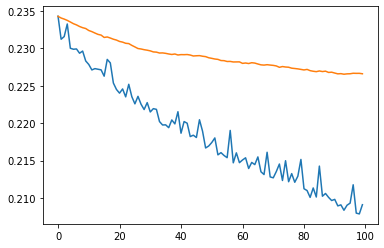

In [80]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))
plt.plot(range(len(history.history.get('val_loss'))), history.history.get('val_loss'))

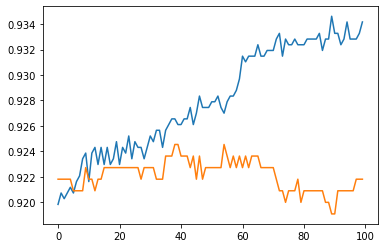

In [81]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))
plt.plot(range(len(history.history.get('val_accuracy'))), history.history.get('val_accuracy'))

###評估預測結果

In [82]:
predictions = model(test_x).numpy()

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [83]:
predictions

array([[0.7871417 ],
       [0.01863903],
       [0.02990454],
       ...,
       [0.03284294],
       [0.00699295],
       [0.11133883]], dtype=float32)

In [0]:
pred_y = (predictions > 0.5)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y )

0.9218181818181819

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y )
cm

array([[930,  20],
       [ 66,  84]])

In [96]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       950
           1       0.81      0.56      0.66       150

    accuracy                           0.92      1100
   macro avg       0.87      0.77      0.81      1100
weighted avg       0.92      0.92      0.92      1100



## 選擇優化器

In [1]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
def tarinProcess(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    model.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [0]:
history1 = tarinProcess('sgd')

In [0]:
history2 = tarinProcess('RMSprop')

In [0]:
history3 = tarinProcess('Adagrad')

In [0]:
history4 = tarinProcess('Adadelta')

In [0]:
history5 = tarinProcess('Adam')

In [14]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

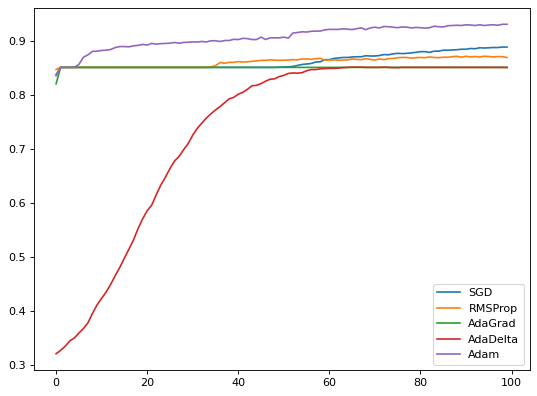

In [15]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history.get('accuracy'), label='SGD')
plt.plot(history2.epoch, history2.history.get('accuracy'), label='RMSProp')
plt.plot(history3.epoch, history3.history.get('accuracy'), label='AdaGrad')
plt.plot(history4.epoch, history4.history.get('accuracy'), label='AdaDelta')
plt.plot(history5.epoch, history5.history.get('accuracy'), label='Adam')
plt.legend()
plt.show()

##k-fold cross validation

In [6]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
def buildClassifier(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = buildClassifier, 
                                                            batch_size = 30, 
                                                            epochs = 100, 
                                                            verbose = 0, 
                                                            optimizer = 'adam')
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [28]:
accuracies

array([0.90156597, 0.9194631 , 0.92393738, 0.9103139 , 0.93721974])

In [29]:
accuracies.mean()

0.918500018119812

In [30]:
accuracies.std()

0.01212183862748183

In [0]:
def buildClassifierWithDropout(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:

classifier2 = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    batch_size = 30, 
    epochs = 100, 
    verbose = 0, 
    optimizer='adam' )


In [0]:
accuracies2 = cross_val_score(estimator = classifier2, X = x_train, y = y_train, cv = 5)

In [35]:
accuracies.mean(),accuracies2.mean()

(0.918500018119812, 0.9140076875686646)

In [36]:
accuracies.std(),accuracies2.std()

(0.01212183862748183, 0.012785336035607334)

Regularization (正則化)

In [0]:
?tf.keras.layers.Dense

In [0]:
 def buildClassifierWithRegularizer(optimizer):
  model = tf.keras.models.Sequential([                                 
  tf.keras.layers.Dense(8, activation='relu', input_dim = 16),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(8, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:

classifier3 = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithRegularizer, 
    batch_size = 30, 
    epochs = 100, 
    verbose = 0, 
    optimizer='adam' )


In [0]:
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = x_train, y = y_train, cv = 5)

In [12]:
accuracies3

array([0.92841166, 0.92170024, 0.93288589, 0.90807176, 0.93946189])

##Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV
classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    epochs = 10,verbose = 0)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)
grid_search     = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy   = grid_search.best_score_

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
best_parameters

{'batch_size': 15, 'optimizer': 'rmsprop'}

In [17]:
best_accuracy

0.8584810985647038

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

##比較機器學習模型

In [19]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 8,  activation = 'relu', input_dim = 16))
model.add(tf.keras.layers.Dense(units = 8,  activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1,  activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=300,
                        verbose=0,
                        validation_data=(x_test, y_test))

In [84]:
predictions = model(x_test).numpy()
predictions

array([[0.8825076 ],
       [0.00800419],
       [0.01472759],
       ...,
       [0.037984  ],
       [0.02017074],
       [0.08064306]], dtype=float32)

In [0]:
y_pred = (predictions > 0.5)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred )

0.9463636363636364

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )

In [88]:
cm

array([[937,  13],
       [ 46, 104]])

In [0]:
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

In [90]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TPR, FPR

(0.953204476093591, 0.1111111111111111)

In [91]:
import numpy as np
TPR_ary = [1]
FPR_ary = [1]
for cutoff in np.arange(0,1,0.1):
  y_pred = (predictions > cutoff)
  cm = confusion_matrix(y_test, y_pred )
  TP = cm[0,0]
  FP = cm[0,1]
  FN = cm[1,0]
  TN = cm[1,1]
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  if pandas.notnull(TPR) and pandas.notnull(FPR): 
    TPR_ary.append(TPR)
    FPR_ary.append(FPR)
TPR_ary.append(0)
FPR_ary.append(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [92]:
TPR_ary

[1,
 0.9654403567447045,
 0.9612159329140462,
 0.9586776859504132,
 0.9548254620123203,
 0.953204476093591,
 0.9485368314833501,
 0.9440559440559441,
 0.9405351833498513,
 0.9350393700787402,
 0]

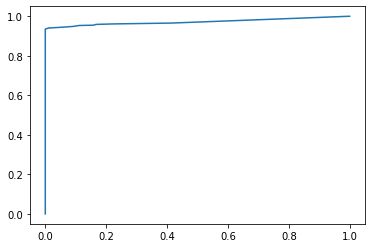

In [93]:
from matplotlib import pyplot as plt
plt.plot(FPR_ary, TPR_ary)

In [0]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, predictions)

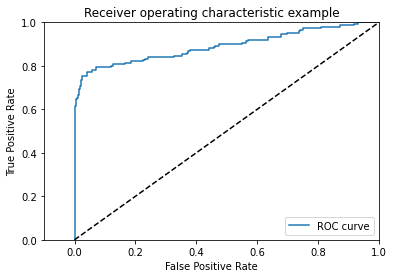

In [99]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [100]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)


0.8910456140350878

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

clf5 = GradientBoostingClassifier()
clf5.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

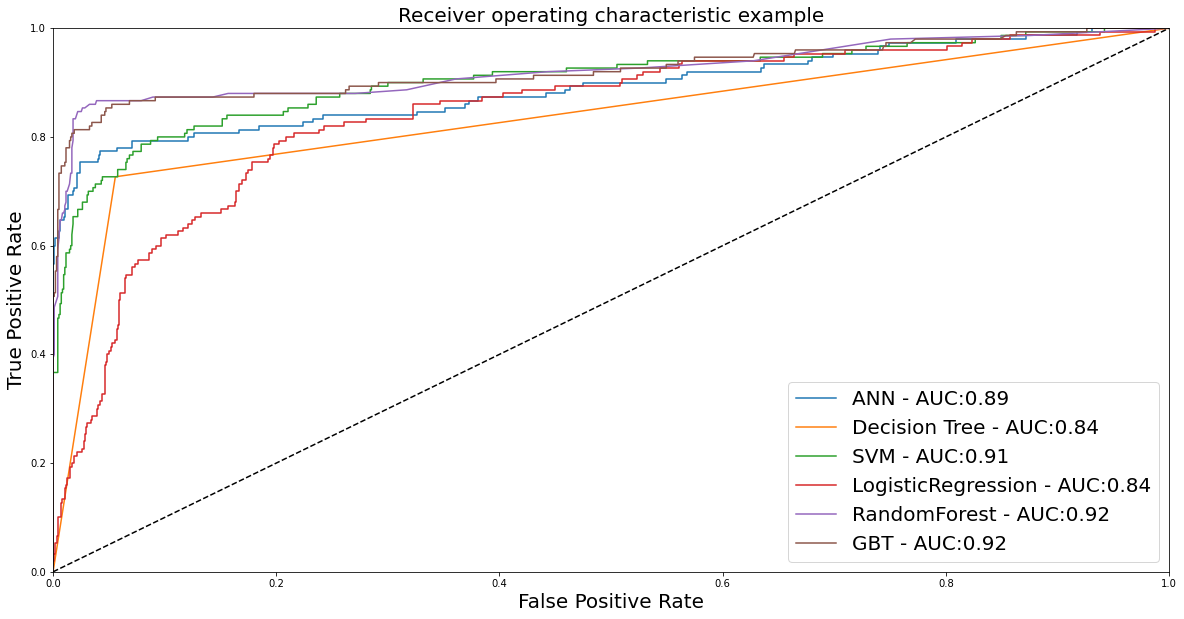

In [103]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4,clf5], 
                      ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GBT']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()